In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pima.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
x
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 102)

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
Y_pred = clf.predict(x_test)

In [6]:
from sklearn.metrics import accuracy_score
print("Accuracy-DecisionTree :",accuracy_score(y_test,Y_pred))

Accuracy-DecisionTree : 0.7012987012987013


In [7]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("For decision tree")
print(classification_report(y_test, Y_pred))

For decision tree
              precision    recall  f1-score   support

           0       0.85      0.69      0.77       108
           1       0.50      0.72      0.59        46

    accuracy                           0.70       154
   macro avg       0.68      0.71      0.68       154
weighted avg       0.75      0.70      0.71       154



In [8]:
# from sklearn import tree
# plt.figure(figsize=(20,20))
# tree.plot_tree(clf,fontsize=8)

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy-Random Forest :",accuracy_score(y_test,y_predict))

Accuracy-Random Forest : 0.7532467532467533


In [11]:
print("For random forest")
print(classification_report(y_test,y_predict))

For random forest
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



In [16]:
feature = pd.DataFrame(
{
    "feature":list(x.columns),
    "importance":clf.feature_importances_
}).sort_values("importance",ascending=False)
feature

,feature,importance
1,Glucose,0.262511
5,BMI,0.161525
7,Age,0.135483
6,DiabetesPedigreeFunction,0.121542
2,BloodPressure,0.087833
0,Pregnancies,0.087751
4,Insulin,0.072025
3,SkinThickness,0.071330


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BMI'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'DiabetesPedigreeFunction'),
  Text(4, 0, 'BloodPressure'),
  Text(5, 0, 'Pregnancies'),
  Text(6, 0, 'Insulin'),
  Text(7, 0, 'SkinThickness')])

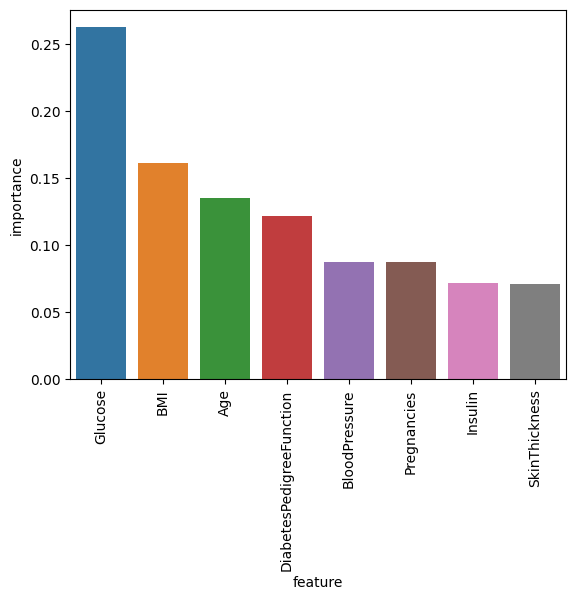

In [20]:
import seaborn as sns
sns.barplot(x=feature.feature,y=feature.importance)
plt.xticks(rotation=90)